In [1]:
library(ComplexHeatmap)
library(ComplexUpset)
library(dplyr)
library(ggplot2)


Lade n"otiges Paket: grid

ComplexHeatmap version 2.15.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union




In [2]:
library(extrafont)
font_import(paths = "/Library/Fonts", prompt = FALSE)
loadfonts()
fonts()


Registering fonts with R

Scanning ttf files in /Library/Fonts ...

Extracting .afm files from .ttf files...

/System/Library/Fonts/Supplemental/Arial Unicode.ttf
 : ArialUnicodeMS already registered in fonts database. Skipping.

/Library/Fonts/FontsFree-Net-MYRIADPRO-REGULAR.ttf
 : MyriadPro-Regular already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library/extrafontdb/metrics

Arial Unicode MS already registered with pdfFont().

Myriad Pro already registered with pdfFont().

Arial Unicode MS already registered with postscriptFont().

Myriad Pro already registered with postscriptFont().



[1] "Arial Unicode MS" "Myriad Pro"

In [3]:
plot_theme <- function() {
  theme_bw() + theme(
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    text = element_text(family = "Myriad Pro", size = 24),
    axis.text = element_text(size = 26),
    axis.title = element_text(size = 30),
    legend.text = element_text(size = 24),
    legend.title = element_text(size = 26),
    legend.key.size = unit(0.8, "cm"),
    plot.title = element_text(size = 30, hjust = 0.5),
    axis.line = element_line(linewidth = 0.7, colour = "black"),
    plot.margin = margin(
      t = 1,
      b = 0.1,
      r = 0.3,
      l = 0.6,
      "cm"
    )
  )
}
options(repr.plot.width = 10, repr.plot.height = 9)


### Visualization of donor matching between Vireo and Multiseq


In [4]:
# Load correlation matrix
correlation_gx12_multiseq_vireo <-
    read.csv(
        "../data/pipeline_output/gx12/donor_match/vireo_1_vs_multiseq_1/correlation_res.csv",
        row.names = "X"
    )
colnames(correlation_gx12_multiseq_vireo) <- gsub(
    "donor", "Donor-",
    colnames(correlation_gx12_multiseq_vireo)
)
rownames(correlation_gx12_multiseq_vireo) <- gsub(
    "-TotalSeqA", "",
    rownames(correlation_gx12_multiseq_vireo)
)

correlation_gx12_multiseq_vireo


,Donor-0,Donor-1,Donor-2,Donor-3,Donor-4,Donor-5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hash451,-0.2275197,0.74937992,-0.18132714,-0.18549398,-0.09556602,-0.19805405
Hash452,-0.2014033,-0.18286343,-0.11152722,-0.16170086,-0.09407122,0.75006417
Hash453,-0.1924779,-0.06637141,0.55651595,-0.09256307,-0.04810021,-0.14982165
Hash454,0.8930860,-0.25194820,-0.19171140,-0.18771778,-0.12500167,-0.19582197
Hash455,-0.1037505,-0.08837050,-0.01772064,-0.06368348,0.52835531,-0.06691017
Hash456,-0.1832036,-0.19431709,-0.13199943,0.78693512,-0.09013880,-0.14997682


In [5]:
# Scale the matrix between -1 and 1
correlation_gx12_multiseq_vireo <-
    as.matrix(correlation_gx12_multiseq_vireo)

min_value <- min(correlation_gx12_multiseq_vireo)
max_value <- max(correlation_gx12_multiseq_vireo)

scaled_matrix_multiseq_vireo <-
    ((correlation_gx12_multiseq_vireo - min_value) / (max_value - min_value)) * 2 - 1
scaled_matrix_multiseq_vireo


,Donor-0,Donor-1,Donor-2,Donor-3,Donor-4,Donor-5
Hash451,-0.9573314,0.7489925,-0.8766481,-0.8839262,-0.7268515,-0.9058646
Hash452,-0.9117145,-0.8793315,-0.7547305,-0.8423674,-0.7242406,0.7501877
Hash453,-0.8961249,-0.6758581,0.4121223,-0.7216063,-0.6439443,-0.8216183
Hash454,1.0000000,-1.0000000,-0.8947860,-0.8878105,-0.7782659,-0.9019658
Hash455,-0.7411471,-0.7142833,-0.5908811,-0.6711631,0.3629349,-0.6767991
Hash456,-0.8799256,-0.8993373,-0.7904887,0.8145892,-0.7173719,-0.8218894


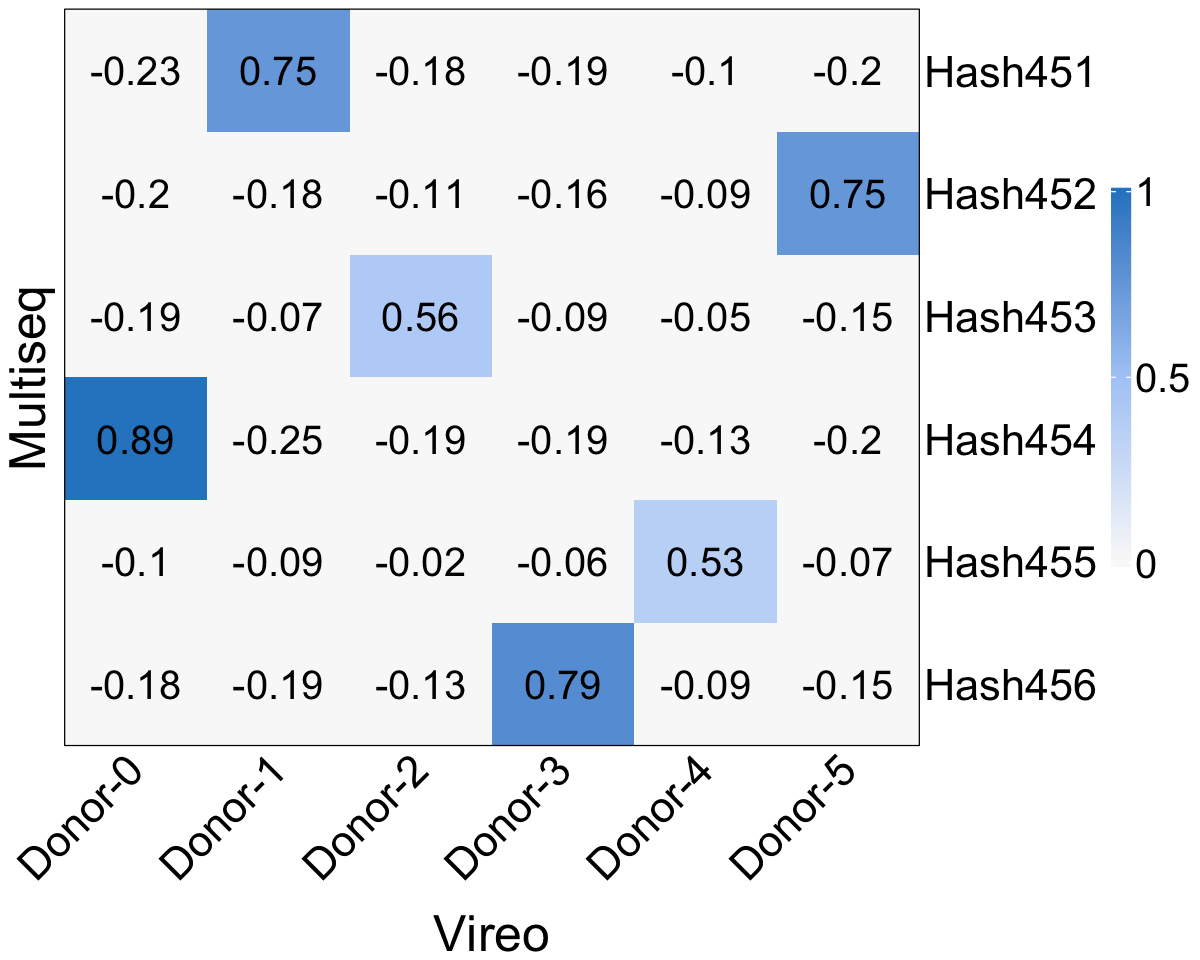

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
cpalette <-
  circlize::colorRamp2(c(0, 0.5, 1), hcl.colors(4, "Blues 3", rev = T)[1:3])

# Sort the axis
scaled_matrix_multiseq_vireo <-
  scaled_matrix_multiseq_vireo[order(row.names(scaled_matrix_multiseq_vireo)), ]

# pdf(
#   "fig3/concordance_heatmap_gx12.pdf",
#   family = "Myriad Pro",
#   width = 10,
#   height = 8
# )

Heatmap(
  scaled_matrix_multiseq_vireo,
  name = " ",
  cluster_columns = FALSE,
  cluster_rows = FALSE,
  row_title = "Multiseq",
  column_title = "Vireo",
  column_title_side = "bottom",
  border = TRUE,
  column_title_gp = gpar(fontsize = 30),
  row_title_gp = gpar(fontsize = 30),
  row_names_gp = gpar(fontsize = 26),
  column_names_gp = gpar(fontsize = 26, rot = 45),
  column_names_rot = 45,
  col = cpalette,
  heatmap_legend_param = list(
    legend_height = unit(8, "cm"),
    labels_gp = gpar(fontsize = 24)
  ),
  cell_fun = function(j, i, x, y, w, h, col) {
    grid.text(round(correlation_gx12_multiseq_vireo[i, j], 2),
      x,
      y,
      gp = gpar(fontsize = 24, col = "black")
    )
  }
)
# dev.off()


### Summarize all donor matching result


In [7]:
### Matching scores Among all genotype- and hashing-based methods
all_score <- read.csv("../data/pipeline_output/gx12/donor_match/score_record.csv")
all_score


best_method1,best_method2,score,matched_donor,remain_na
<chr>,<chr>,<dbl>,<int>,<lgl>
freemuxlet_1,demuxem_1,0.730876057,6,FALSE
freemuxlet_1,hashsolo_1,0.005432033,2,TRUE
freemuxlet_1,htodemux_1,0.174024589,4,TRUE
freemuxlet_1,multiseq_1,0.694451862,6,FALSE
freemuxlet_1,hashedDrops_1,0.747168833,5,TRUE
freemuxlet_1,gmm_demux_1,0.103427779,3,TRUE
freemuxlet_1,bff_1,0.000000000,0,TRUE
scsplit_1,demuxem_1,0.591616257,6,FALSE
scsplit_1,hashsolo_1,0.005965695,2,TRUE


In [8]:
score_matrix <-
    reshape(all_score[, 1:3],
        idvar = "best_method1",
        timevar = "best_method2",
        direction = "wide"
    )
score_matrix <- as.matrix(score_matrix[, -1])
colnames(score_matrix) <-
    c(
        "DemuxEM",
        "HashSolo",
        "HTODemux",
        "Multiseq",
        "hashedDrops",
        "GMM_Demux",
        "BFF"
    )
rownames(score_matrix) <-
    c("Freemuxlet", "scSplit", "Souporcell", "Vireo")
score_matrix <-
    score_matrix[, c(
        "BFF",
        "DemuxEM",
        "GMM_Demux",
        "hashedDrops",
        "HashSolo",
        "HTODemux",
        "Multiseq"
    )]
score_matrix


,BFF,DemuxEM,GMM_Demux,hashedDrops,HashSolo,HTODemux,Multiseq
Freemuxlet,0.000000000,0.7308761,0.1034278,0.7471688,0.005432033,0.1740246,0.6944519
scSplit,0.004407695,0.5916163,0.1106627,0.7368967,0.005965695,0.1592075,0.5790836
Souporcell,0.000000000,0.7418230,0.1320761,0.7471688,0.005517447,0.1790759,0.7055291
Vireo,0.004083063,0.7459269,0.1131887,0.7471688,0.005585453,0.1818275,0.7107227


In [9]:
donor_matched <-
    reshape(all_score[, c(1, 2, 5)],
        idvar = "best_method1",
        timevar = "best_method2",
        direction = "wide"
    )
donor_matched <- as.matrix(donor_matched[, -1])
colnames(donor_matched) <-
    c(
        "DemuxEM",
        "HashSolo",
        "HTODemux",
        "Multiseq",
        "hashedDrops",
        "GMM_Demux",
        "BFF"
    )
rownames(donor_matched) <-
    c("Freemuxlet", "scSplit", "Souporcell", "Vireo")
donor_matched <-
    donor_matched[, c(
        "BFF",
        "DemuxEM",
        "GMM_Demux",
        "hashedDrops",
        "HashSolo",
        "HTODemux",
        "Multiseq"
    )]
donor_matched <- +(!donor_matched)
donor_matched


,BFF,DemuxEM,GMM_Demux,hashedDrops,HashSolo,HTODemux,Multiseq
Freemuxlet,0,1,0,0,0,0,1
scSplit,0,1,0,0,0,0,1
Souporcell,0,1,0,0,0,0,1
Vireo,0,1,0,0,0,0,1


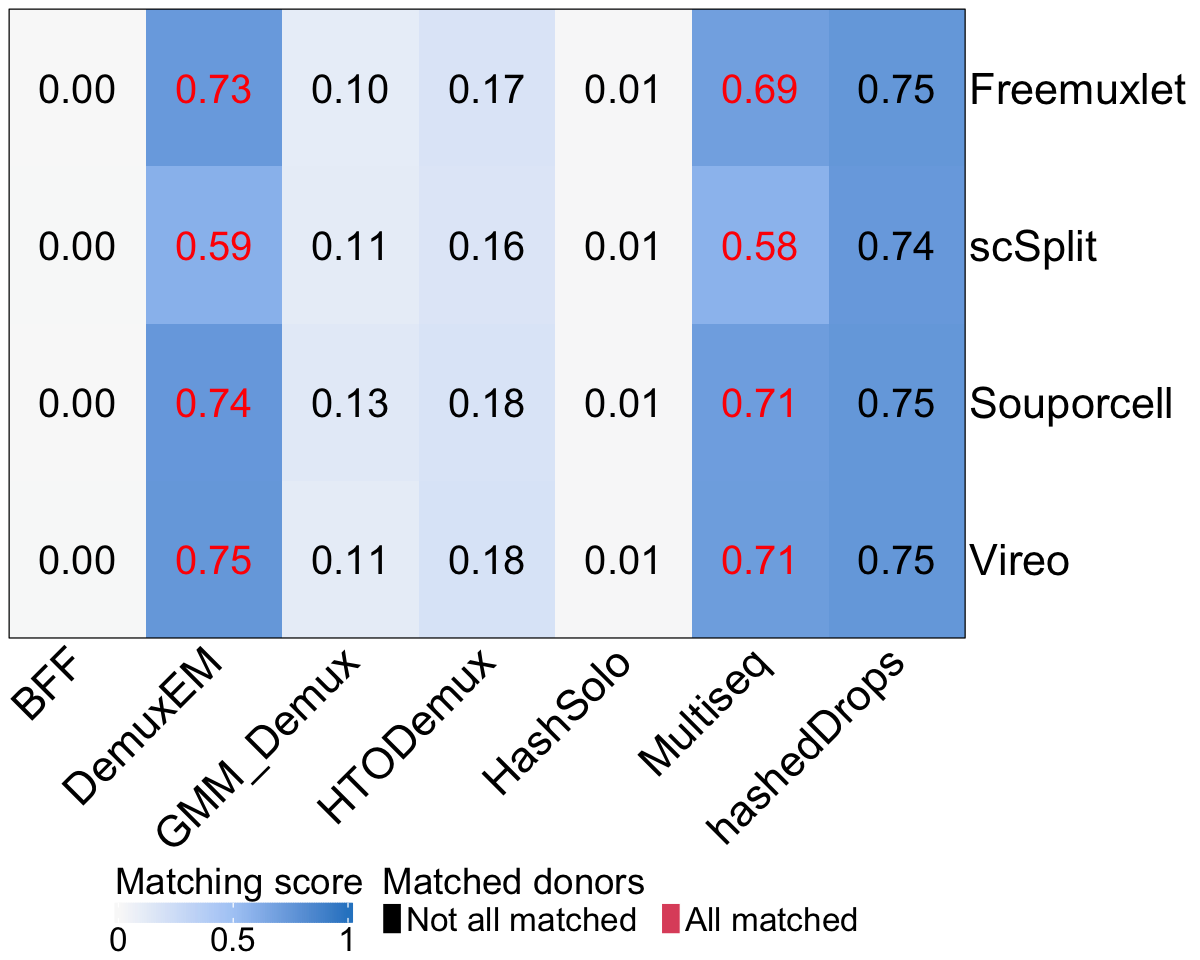

In [10]:
# pdf("fig3/heatmap_donor_match_gx12.pdf",
#   family = "Myriad Pro", width = 10, height = 8
# )
ht <- Heatmap(
  score_matrix,
  name = "Matching score",
  cluster_rows = FALSE,
  show_column_dend = FALSE,
  column_order = sort(colnames(score_matrix)),
  column_title_side = "bottom",
  border = TRUE,
  # row_title = "Genotype-based deconvolutoon methods",
  # column_title = "Hashing-based deconvolutoon methods",
  row_names_gp = grid::gpar(fontsize = 26),
  column_names_gp = grid::gpar(fontsize = 26),
  column_title_gp = gpar(fontsize = 30),
  row_title_gp = gpar(fontsize = 30),
  heatmap_legend_param = list(
    labels_gp = gpar(fontsize = 20),
    title_gp = gpar(fontsize = 22),
    direction = "horizontal",
    legend_width = unit(5, "cm")
  ),
  column_names_rot = 45,
  col = cpalette,
  cell_fun = function(j, i, x, y, width, height, fill) {
    if (donor_matched[i, j] == 1) {
      grid.text(sprintf("%.2f", score_matrix[i, j]),
        x,
        y,
        gp = gpar(fontsize = 24, col = "red")
      )
    } else {
      grid.text(sprintf("%.2f", score_matrix[i, j]),
        x,
        y,
        gp = gpar(fontsize = 24, col = "black")
      )
    }
  }
)
lgd_list <- list(
  Legend(
    labels = c("Not all matched", "All matched"),
    title = "Matched donors",
    ncol = 2,
    # title_position = "topcenter",
    gap = unit(0.5, "cm"),
    legend_gp = gpar(fill = 1:2),
    title_gp = gpar(fontsize = 22),
    labels_gp = gpar(fontsize = 20)
  )
)

draw(ht,
  heatmap_legend_list = lgd_list,
  heatmap_legend_side = "bottom"
)
# dev.off()


Barplot.


In [11]:
df <- data.frame(
    donors = c(
        "Hash454",
        "Hash456",
        "Hash452",
        "Hash451",
        "Hash453",
        "Hash455"
    ),
    orig_no_var = c(7723, 4969, 3362, 2395, 1790, 1041),
    filtered_variants = c(4200, 1869, 732, 555, 436, 83)
)

df$total_donor_variants <- df$orig_no_var - df$filtered_variants

df <- df %>%
    select(-orig_no_var) %>%
    reshape2::melt(id.cols = "hash") %>%
    mutate(variable = factor(
        variable,
        levels = c("total_donor_variants", "filtered_variants")
    ))


Using donors as id variables



In [12]:
df$variable <- gsub("_", " ", df$variable)
df$variable <- gsub("filtered", "Filtered", df$variable)
df$variable <- gsub("total", "Total", df$variable)


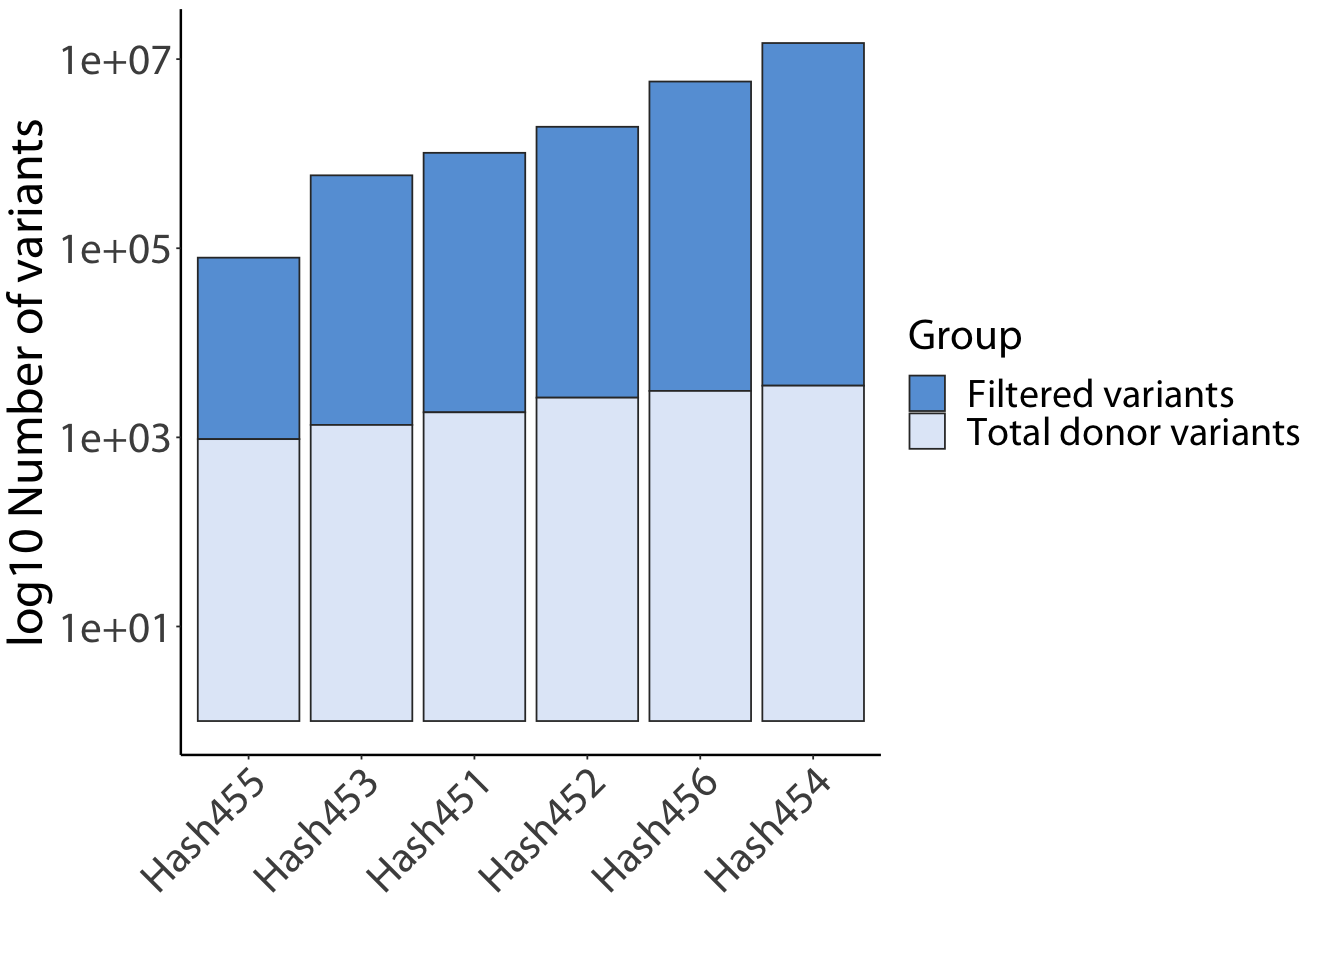

In [13]:
options(repr.plot.width = 11, repr.plot.height = 8)
ggplot(df, aes(reorder(donors, value), value, fill = variable)) +
  geom_bar(
    stat = "identity",
    position = "stack",
    color = "grey20"
  ) +
  scale_y_log10() +
  ylab("log10 Number of variants") +
  xlab("Donor id") +
  theme_bw() +
  xlab("") +
  theme(
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(linewidth = 0.7, colour = "black"),
    text = element_text(family = "Myriad Pro", size = 24),
    axis.text = element_text(size = 26),
    axis.text.x = element_text(
      angle = 45,
      vjust = 1,
      hjust = 1
    ),
    axis.title = element_text(size = 30),
    legend.text = element_text(size = 24),
    legend.title = element_text(size = 26),
    legend.key.size = unit(0.8, "cm"),
    plot.title = element_text(size = 30, hjust = 0.5)
  ) +
  scale_fill_manual(
    name = "Group",
    values = c(
      "Total donor variants" = "#e1eaf8",
      "Filtered variants" = "#66a0da"
    )
  )
# ggsave(
#   "fig3/donor_variants.pdf",
#   dpi = 300,
#   height = 8,
#   width = 11
# )
